<a href="https://colab.research.google.com/github/pranshudatascience/Food-and-non-food-image-dataset/blob/main/Food_and_non_food_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# **Uploading Data via Kaggle Api**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datasciencepranshu","key":"f206fef76574e388b3dba86a1861be62"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d trolukovich/food5k-image-dataset

 95% 405M/426M [00:04<00:00, 75.2MB/s]
100% 426M/426M [00:04<00:00, 97.8MB/s]


In [19]:
from zipfile import ZipFile
file_name = "food5k-image-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [20]:
#Give dataset path
train_path = '/content/training'
test_path = '/content/validation'

In [21]:
folders = glob('/content/validation/*')
len(folders)

2

In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Designing Our Model**

In [23]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [24]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=2, activation='sigmoid')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [25]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

# **Image Augmentation**

In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory('/content/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 2 classes.


# **Training Our Model**

In [29]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
94/94 [==============================] - 89s 561ms/step - loss: 0.1469 - accuracy: 0.9520 - val_loss: 0.0643 - val_accuracy: 0.9770
Epoch 2/10
94/94 [==============================] - 50s 530ms/step - loss: 0.0466 - accuracy: 0.9827 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 3/10
94/94 [==============================] - 51s 538ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0408 - val_accuracy: 0.9900
Epoch 4/10
94/94 [==============================] - 51s 545ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0332 - val_accuracy: 0.9940
Epoch 5/10
94/94 [==============================] - 50s 535ms/step - loss: 0.0187 - accuracy: 0.9927 - val_loss: 0.0692 - val_accuracy: 0.9880
Epoch 6/10
94/94 [==============================] - 51s 540ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0507 - val_accuracy: 0.9900
Epoch 7/10
94/94 [==============================] - 51s 542ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0607 - val_accuracy: 0.9860

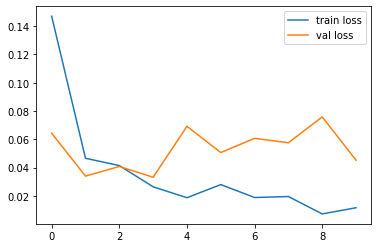

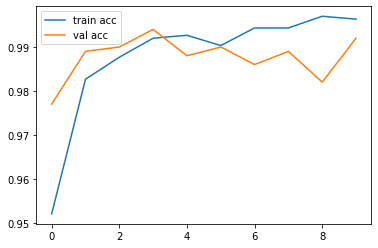

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
from tensorflow.keras.models import load_model

model.save('modelfood.h5')

# **Making Predictions**

In [32]:
y_pred = model.predict(test_set)

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [41]:
classes = ["   FOOD !!! , You Can Eat it  ","   NOT-FOOD!!!,Dont even think of Eating!"]

In [42]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('---------------------------------------Food Image dataset Detection-----------------------------------------')
    print()
    print('---------------------------------------THE Given Image is-------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


---------------------------------------Food Image dataset Detection-----------------------------------------

---------------------------------------THE Given Image is-------------------------------------------------

   FOOD !!! , You Can Eat it  


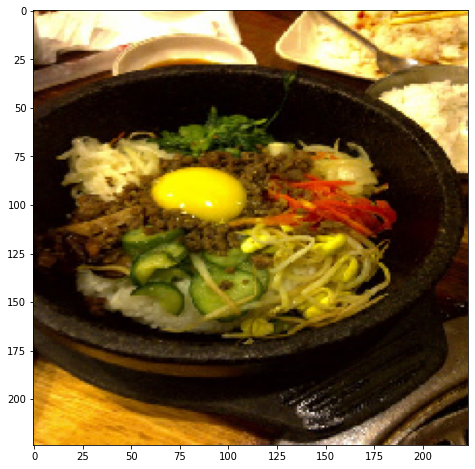

In [43]:
im=image.load_img('/content/validation/food/10.jpg',target_size=(224,224))
predict_image(im)


---------------------------------------Food Image dataset Detection-----------------------------------------

---------------------------------------THE Given Image is-------------------------------------------------

   FOOD !!! , You Can Eat it  


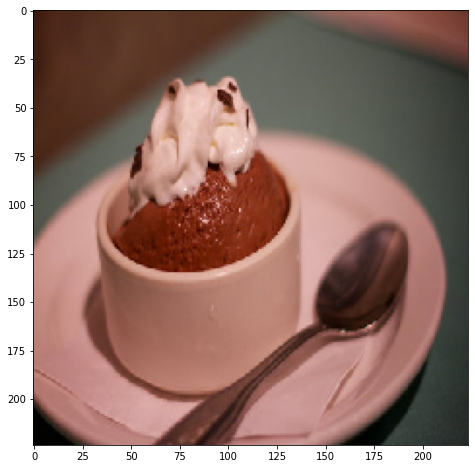

In [44]:
im2=image.load_img('/content/validation/food/104.jpg',target_size=(224,224))
predict_image(im2)


---------------------------------------Food Image dataset Detection-----------------------------------------

---------------------------------------THE Given Image is-------------------------------------------------

   NOT-FOOD!!!,Dont even think of Eating!


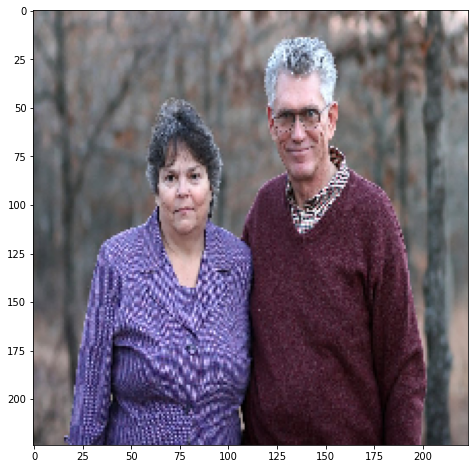

In [45]:
im3=image.load_img('/content/validation/non_food/105.jpg',target_size=(224,224))
predict_image(im3)


---------------------------------------Food Image dataset Detection-----------------------------------------

---------------------------------------THE Given Image is-------------------------------------------------

   NOT-FOOD!!!,Dont even think of Eating!


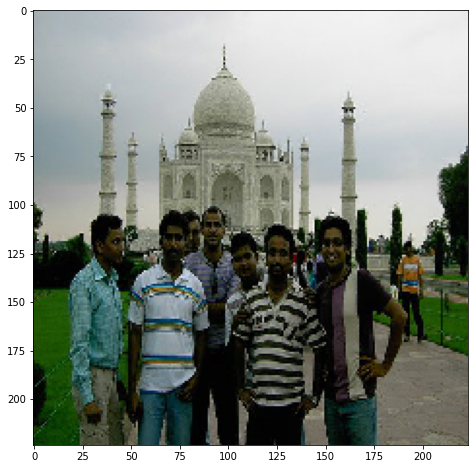

In [46]:
im4=image.load_img('/content/evaluation/non_food/100.jpg',target_size=(224,224))
predict_image(im4)


---------------------------------------Food Image dataset Detection-----------------------------------------

---------------------------------------THE Given Image is-------------------------------------------------

   FOOD !!! , You Can Eat it  


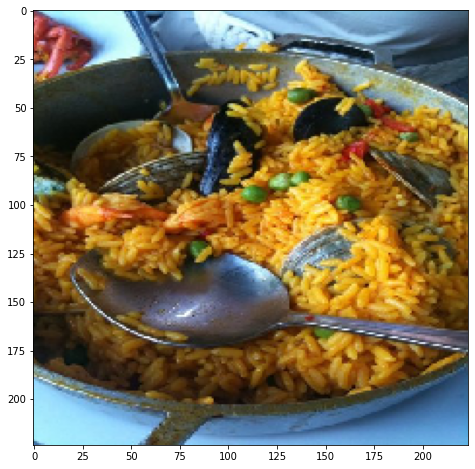

In [47]:
im5=image.load_img('/content/evaluation/food/100.jpg',target_size=(224,224))
predict_image(im5)